# **Object Tracking using OpenCV on Raspberry Pi**

Object tracking involves localizing an object in consecutive video frames. OpenCV provides several high-performance trackers, such as CSRT (for accuracy) and KCF (for speed), which are perfect for the RPi.

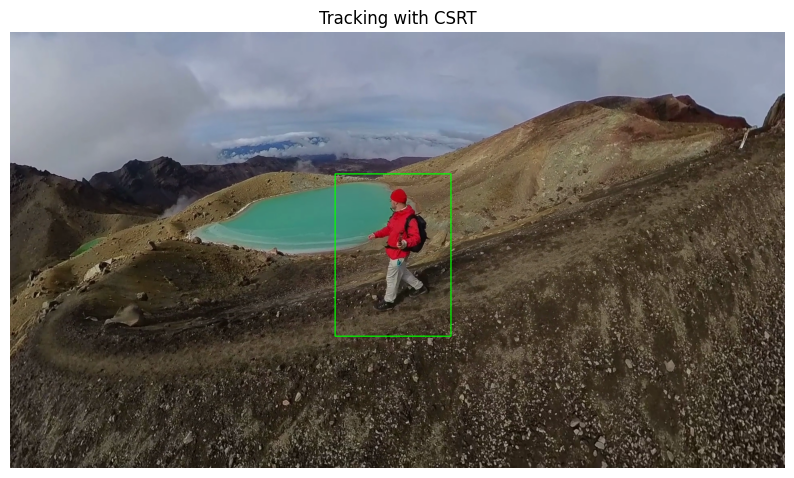

Video ended
Tracking video saved successfully


In [ ]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

video_path = "video5.mp4"
output_path = "output.mp4"

cap = cv2.VideoCapture(video_path)

ok, frame = cap.read()
if not ok:
    print("Error reading video")

plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("First Frame - Note the coordinates to crop objects")
plt.axis("off")
plt.show()

# Choose your tracker here
tracker_type = "CSRT"


# Frames to skip
frame_skip = 4   # Process every 3rd frame (increase for faster output)

# Your ROI bounding boxes (x, y, w, h)
bboxes = [(800, 380, 250, 350)]

# Create MultiTracker
multi_tracker = cv2.legacy.MultiTracker_create()

# Add the chosen trackers
for box in bboxes:
    if tracker_type == "CSRT":
        tracker = cv2.legacy.TrackerCSRT_create()
    elif tracker_type == "KCF":
        tracker = cv2.legacy.TrackerKCF_create()
    else:
        raise ValueError("Tracker must be 'CSRT' or 'KCF'")
    multi_tracker.add(tracker, frame, tuple(box))

# Set up video writer
fps = cap.get(cv2.CAP_PROP_FPS)
h, w, _ = frame.shape
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps // frame_skip if fps >= frame_skip else fps, (w, h))

print("Saving output to:", output_path)

frame_index = 0

# Tracking loop
while True:
    ok, frame = cap.read()
    if not ok:
        print("Video ended")
        break

    # Skip frames
    if frame_index % frame_skip != 0:
        frame_index += 1
        continue

    ok, boxes = multi_tracker.update(frame)

    # Draw tracked boxes
    for box in boxes:
        x, y, w_box, h_box = [int(v) for v in box]
        cv2.rectangle(frame, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)

    # Save frame to output video
    out.write(frame)

    # Display inside notebook
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Tracking with {tracker_type}")
    plt.show()

    frame_index += 1

cap.release()
out.release()

print("Tracking video saved successfully")
